# Upload data and delete missing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("full_data.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.dtypes


gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<AxesSubplot:>

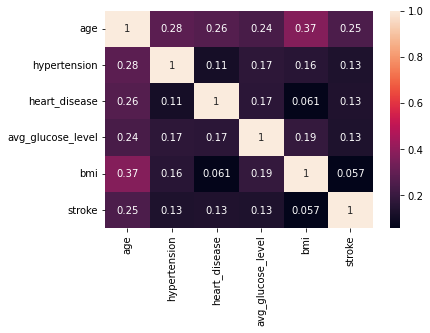

In [6]:
sns.heatmap(df.corr(),annot=True)


In [7]:
df = df[df.smoking_status != "Unknown"]

In [8]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [9]:
features = df[['gender', 'age', 'hypertension', 'heart_disease','work_type', 'Residence_type', 'ever_married', 'avg_glucose_level', 'bmi', 'smoking_status']]
target = df['stroke']
labels = df['stroke']


Seperate data into train and test data

# Decision Tree


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohc.fit(features)
onehotlabels = ohc.transform(features)
onehotlabels.shape

(3481, 3342)

In [11]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(onehotlabels,target,test_size = 0.2,random_state =2)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn import metrics

DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)

# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []


acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

comp = pd.DataFrame({'predicted':predicted_values, 'res': Ytest })
comp

DecisionTrees's Accuracy is:  93.4002869440459
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       651
           1       0.00      0.00      0.00        46

    accuracy                           0.93       697
   macro avg       0.47      0.50      0.48       697
weighted avg       0.87      0.93      0.90       697



D:\app\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\app\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\app\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,predicted,res
3797,0,0
558,0,0
2008,0,0
69,0,1
2035,0,0
...,...,...
3210,0,0
4535,0,0
606,0,0
1497,0,0


In [13]:
from sklearn.model_selection import cross_val_score
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, onehotlabels, target,cv=5)
score


array([0.93256815, 0.93821839, 0.94109195, 0.94109195, 0.93103448])

## Saving trained Decision Tree model


In [14]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()


FileNotFoundError: [Errno 2] No such file or directory: '../models/DecisionTree.pkl'

# Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,onehotlabels,target,cv=5)
score


## Saving trained Random Forest model


In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,onehotlabels,target,cv=5)
score


# Support Vector Machine (SVM)


In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MaxAbsScaler
# fit scaler on training data
norm = MaxAbsScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,onehotlabels,target,cv=5)
score


# Accuracy Comparison


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

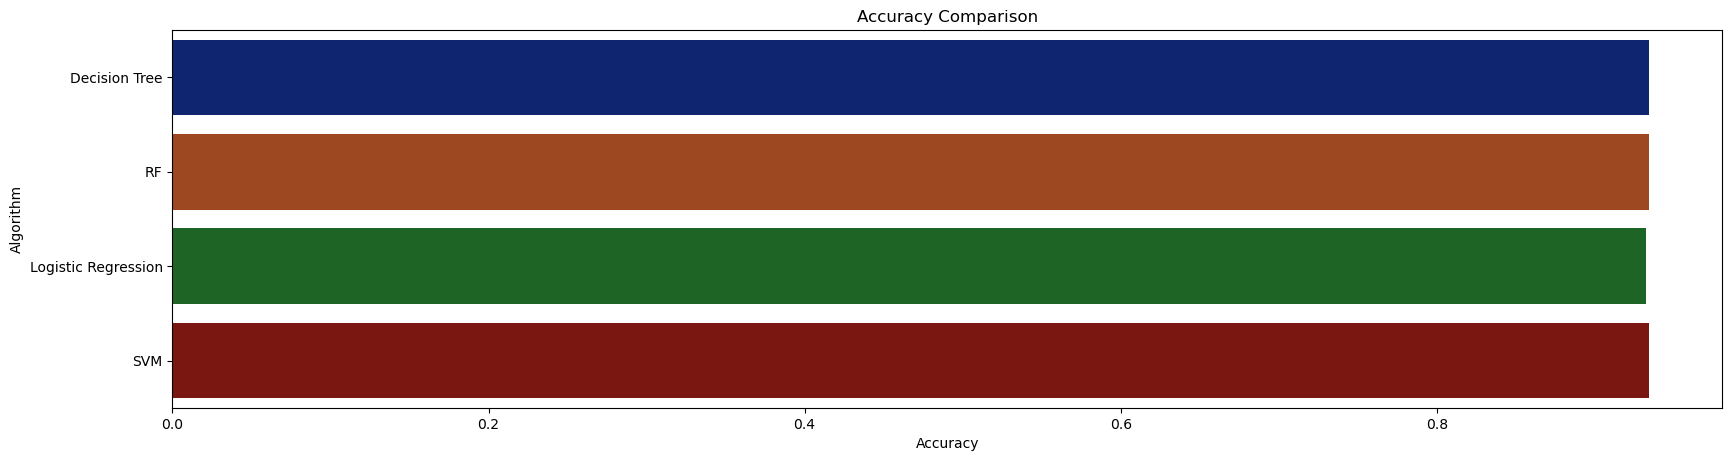

In [148]:
plt.figure(figsize=[20,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')


In [166]:
data = {"gender":"Male", "age": 67, "hypertension": 0, "heart_disease": 1, "work_type": "Private", "Residence_type": "Urban", "ever_married": "Yes", "avg_glucose_level": 228.69, "bmi": 36.6, "smoking_status": "formerly smoked"}
data = pd.DataFrame([data])
data

,gender,age,hypertension,heart_disease,work_type,Residence_type,ever_married,avg_glucose_level,bmi,smoking_status
0,Male,67,0,1,Private,Urban,Yes,228.69,36.6,formerly smoked


In [168]:
test = ohc.transform(data)

prediction = RF.predict(test)
print(prediction)


[1]
